<a href="https://colab.research.google.com/github/brunopdrocha/SNLP_IBMEC/blob/main/1_Bruno_Pil%C3%A3o_%7C_Gustavo_Raia_Evas%C3%A3o_banc%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DESAFIO 01 - EVASÃO BANCÁRIA (CHURN)**

Vamos usar [este conjunto de dados](https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Churn_Dataset.csv) para tentar prever evasão de clientes no setor bancário.

Este conjunto de dados contém informações sobre clientes bancários que deixaram o banco ou continuam sendo seus clientes. O conjunto de dados inclui as seguintes variáveis:

- **Customer ID**: identificador único para cada cliente
- **Surname**: sobrenome do cliente
- **Credit Score**: valor numérico representando o score de crédito do cliente, ou seja, uma classificação interna do quão bom pagador ele é
- **Geography**: país onde o cliente reside (França, Espanha ou Alemanha)
- **Gender**: gênero do cliente (masculino ou feminino)
- **Age**: idade do cliente.
- **Tenure**: número de anos que o cliente está no banco.
- **Balance**: saldo da conta do cliente.
- **NumOfProducts**: número de produtos bancários utilizados pelo cliente (por exemplo, conta poupança, cartão de crédito).
- **HasCrCard**: se o cliente tem um cartão de crédito (1 = sim, 0 = não).
- **IsActiveMember**: se o cliente é um membro ativo (1 = sim, 0 = não).
- **EstimatedSalary**: renda estimada do cliente.
- **Exited**: evasão do cliente (1 = sim, 0 = não) ***(Variável alvo)***.


## **TAREFA**

Seu objetivo é utilizar um modelo de machine learning rasa para prever a possibilidade de um cliente cancelar sua conta no banco.

Você deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução do modelo escolhido.

Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do seu modelo deverá ser avaliada pelas métricas Acurácia, Precision, Recall e F1-Score. Inclua em sua avaliação final de performance Curvas, ROC e/ou Precision-Recall, de acordo com a necessidade.

# Análise de Evasão Bancária

Este notebook tem como objetivo analisar e prever a evasão de clientes no setor bancário por meio de modelos de aprendizado de máquina. A abordagem inclui a exploração dos dados, a aplicação de técnicas de pré-processamento e a construção de modelos preditivos para identificar padrões e fatores que influenciam a saída dos clientes.

In [ ]:
# Antes de iniciarmos nossa análise vamos importar bibliotecas para a análise de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA
Nesta seção, realizamos a Análise Exploratória de Dados (EDA) para compreender melhor as características do conjunto de dados. Aplicamos estatísticas descritivas e visualizações para identificar padrões, possíveis inconsistências, valores ausentes e correlações entre variáveis. Essa etapa é essencial para obter insights preliminares e orientar as próximas fases da modelagem preditiva.

### Vizualização inicial dos dados
Antes de realizar qualquer operação ou tratamento nos dados, é fundamental compreender a estrutura do conjunto de dados disponível. Nesta etapa, analisamos a amostra para identificar a distribuição das variáveis, os tipos de dados presentes e possíveis inconsistências. Essa análise inicial permite uma melhor preparação para as próximas etapas do pipeline de modelagem.


In [ ]:
# Vamos realizar nossa primeira visualização de dados
df = pd.read_csv('https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Churn_Dataset.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5820,5821,15717231,Yang,721,Germany,Male,37.0,4,98459.60,1,0.0,0.0,90821.66,0
2399,2400,15672516,Wall,541,Germany,Male,51.0,7,90373.28,2,1.0,0.0,179861.79,0
8998,8999,15692577,Tomlinson,674,Germany,Female,38.0,10,83727.68,1,1.0,0.0,45418.12,0
1635,1636,15604804,Lu,516,France,Female,33.0,7,127305.50,1,1.0,1.0,120037.36,0
5424,5425,15566253,Manning,580,Germany,Male,44.0,9,143391.07,1,0.0,0.0,146891.07,1
9772,9773,15750549,Akobundu,660,Germany,Male,30.0,1,84440.10,2,1.0,1.0,60485.98,0
744,745,15670755,Shaw,650,France,Male,60.0,8,0.00,2,1.0,1.0,102925.76,0
4718,4719,15675787,Rivera,505,France,Male,26.0,8,112972.57,1,1.0,0.0,145011.62,0
5186,5187,15722425,Lucchese,639,France,Male,32.0,9,0.00,2,1.0,0.0,111340.36,0
6742,6743,15783463,Read,678,France,Female,26.0,1,0.00,2,1.0,0.0,45443.68,0


In [ ]:
# Antes de realizar vamos verificar os tipos de valores de cada variavel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Com base na análise inicial, podemos considerar a remoção de algumas variáveis que não contribuem diretamente para a modelagem preditiva:

- **CustomerId**: Identificador único do cliente, sem relevância para a análise estatística.

- **Gender**: Variável categórica que pode não ser significativa para o modelo, dependendo do contexto da análise.

- **Surname**: Nome do cliente, sem valor preditivo direto.

- **RowNumber**: Índice da linha, sem influência nos padrões de evasão.


In [ ]:
# Para nossa analise vamos remover de nosso df os seguintes campos (CustomerId,Age,IsActiveMember,Gender,Surname,RowNumber)
df.drop(['CustomerId','Gender','Surname','RowNumber'], axis=1, inplace=True)
df.sample(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8494,671,Germany,36.0,2,116695.27,1,0.0,0.0,193201.86,0
7501,681,France,58.0,8,93173.88,1,1.0,1.0,139761.25,0
9733,733,France,64.0,3,0.00,2,1.0,1.0,75272.63,0
7371,850,France,30.0,10,153972.89,2,1.0,0.0,62811.03,0
5953,516,Spain,31.0,7,0.00,1,1.0,0.0,47018.75,0
8506,767,France,48.0,9,0.00,2,0.0,1.0,175458.21,0
2107,646,Spain,42.0,3,99836.47,1,0.0,1.0,22909.56,0
7612,678,Spain,28.0,5,138668.18,1,1.0,1.0,54144.01,0
7846,557,France,27.0,3,87739.08,1,1.0,1.0,123096.56,0
9013,591,France,34.0,3,96127.27,1,0.0,0.0,30972.06,0


### Analisando variáveis

Nesta etapa, aplicamos análises estatísticas para avaliar a relevância de cada variável no contexto da predição. O objetivo é identificar atributos que possam introduzir ruído ao modelo, prejudicando seu desempenho. Para isso, utilizamos medidas como média, desvio padrão, correlação e distribuição dos dados, buscando eliminar variáveis irrelevantes ou redundantes antes da modelagem.

In [ ]:
# Vamos realizar uma análise estatística
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# Para primeira analise quero verificar se possui valores nulos dentro de nossos dados
df.isnull().sum()

,0
CreditScore,0
Geography,1
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0
Exited,0


Observamos a presença de um único dado faltante nas variáveis Age, HasCrCard e IsActiveMember. Como a quantidade de valores ausentes é insignificante em relação ao total do conjunto de dados, não há necessidade de remoção de registros ou imputação de valores artificiais. Dessa forma, seguimos com a análise sem realizar modificações nesses campos.

In [ ]:
# Vamos verificar a quantidade de campos correspondente a Geography
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2510
Spain,2477


Observamos que Geography é um campo com apenas 3 tipos de resposta logo optamos por mapear estes valores para brevemente realizar uma análise de correlação.


In [ ]:
# Vamos mapear cada um desses paises com um id (France = 1,Germany = 2,Spain = 3)
df['Geography'] = df['Geography'].map({'France': 1, 'Germany': 2, 'Spain': 3})
df.sample(10)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1758,642,2.0,30.0,5,129753.69,1,1.0,0.0,582.53,0
6483,619,2.0,41.0,3,147974.16,2,1.0,0.0,170518.83,0
3327,802,3.0,40.0,5,0.00,2,1.0,1.0,175043.69,0
2289,644,1.0,48.0,8,0.00,2,0.0,1.0,44965.54,1
5815,802,2.0,41.0,4,90757.64,2,0.0,1.0,169183.66,0
1788,439,1.0,43.0,8,0.00,1,0.0,1.0,104889.30,0
5970,470,1.0,35.0,1,96473.59,1,0.0,0.0,5962.30,0
366,540,2.0,42.0,9,87271.41,2,1.0,0.0,172572.64,0
2648,745,1.0,21.0,4,137910.45,1,1.0,1.0,177235.23,0
1226,531,2.0,42.0,6,88324.31,2,1.0,0.0,75248.75,0


### Correlação e Analisar Outliers
Nesta etapa, examinamos a correlação entre as variáveis para identificar relações significativas que possam impactar a predição da evasão bancária. A análise de correlação nos permite entender a proximidade entre as variáveis, ajudando a evitar multicolinearidade e selecionar os atributos mais relevantes para o modelo.

Além disso, realizamos a detecção de outliers, isto é, valores extremos que podem distorcer a análise e afetar o desempenho do modelo. Para isso, utilizamos métodos estatísticos, como o z-score e o IQR (Intervalo Interquartil), além de visualizações como boxplots para identificar pontos discrepantes em cada variável.

<Axes: >

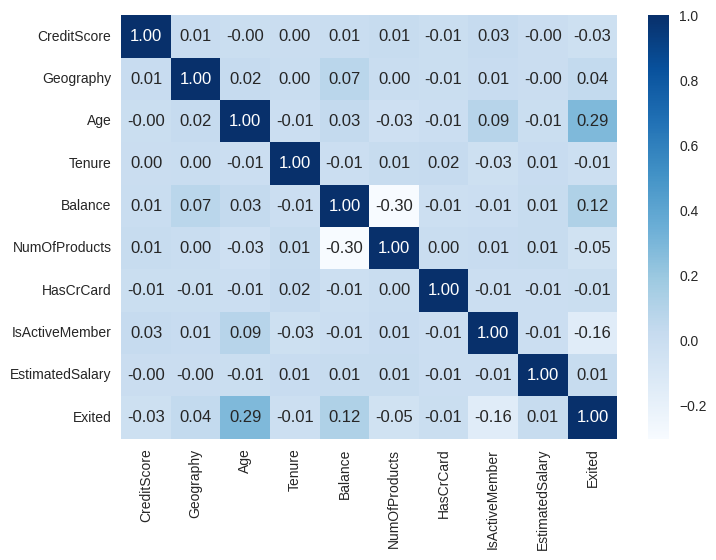

In [ ]:
# Vamos realizar uma correalçao com o Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True,fmt='.2f', cmap='Blues')

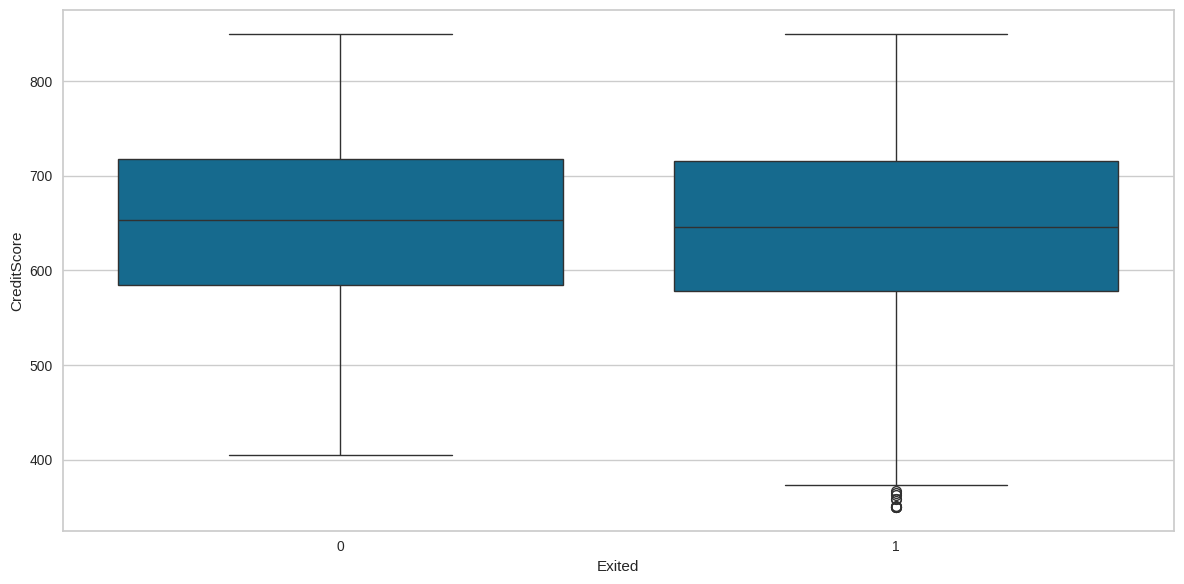

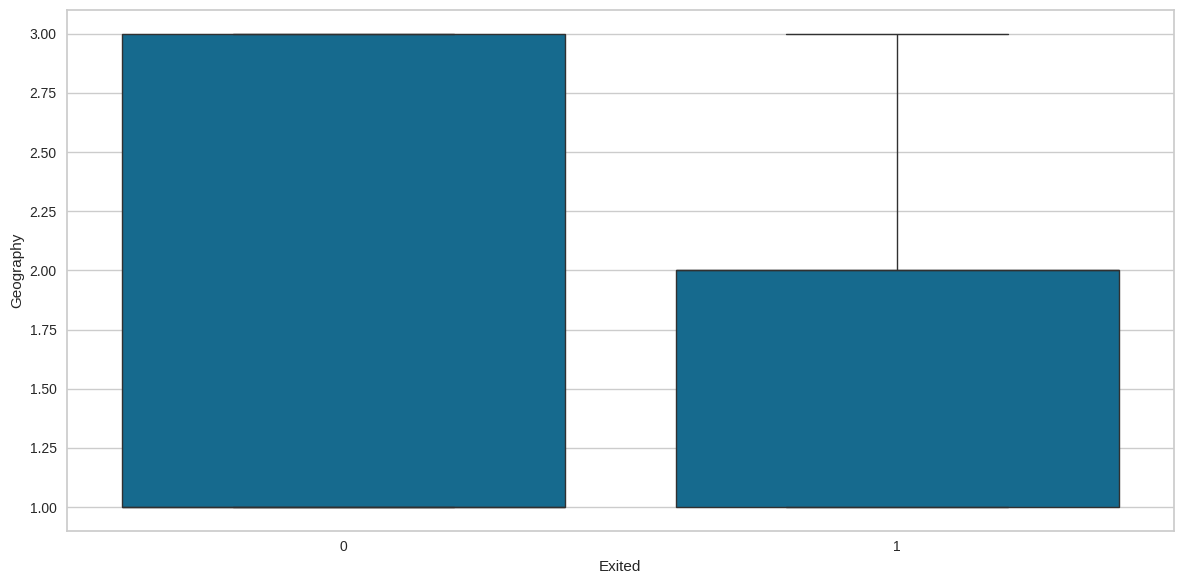

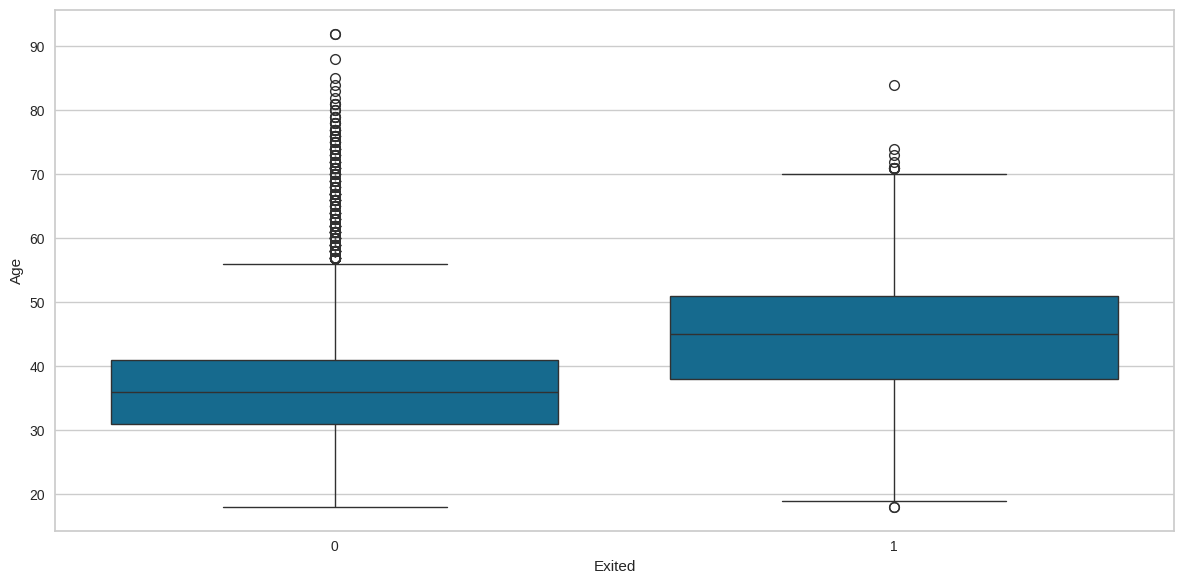

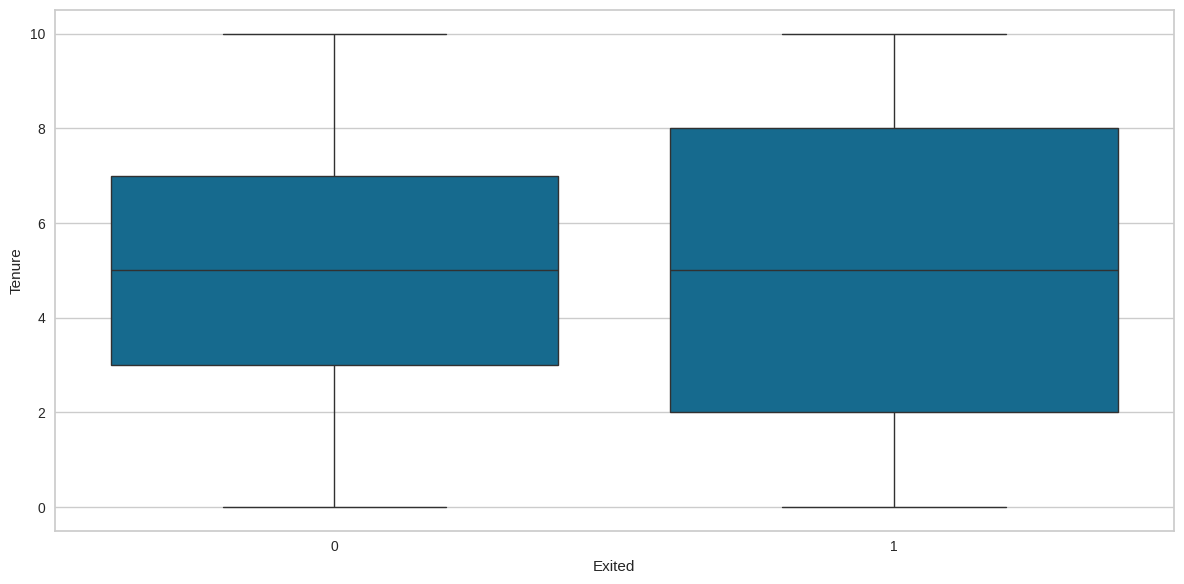

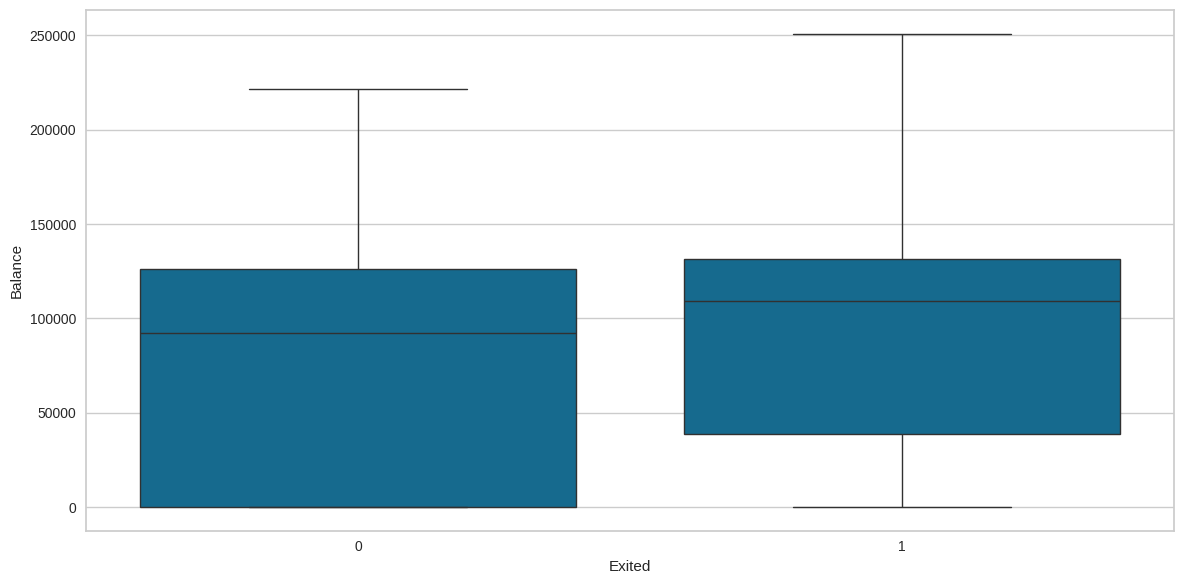

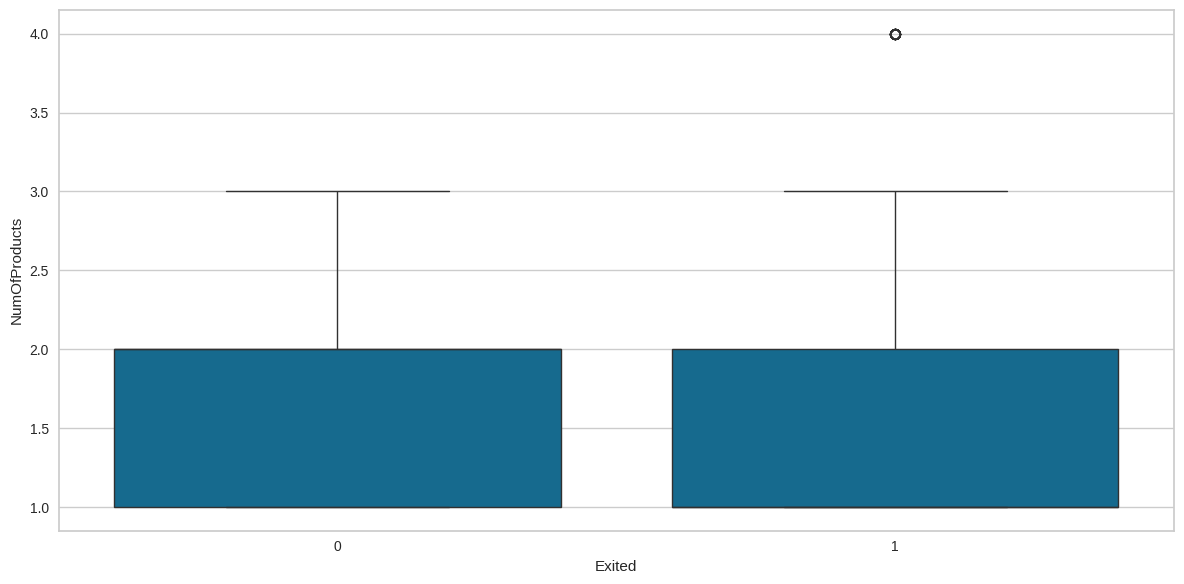

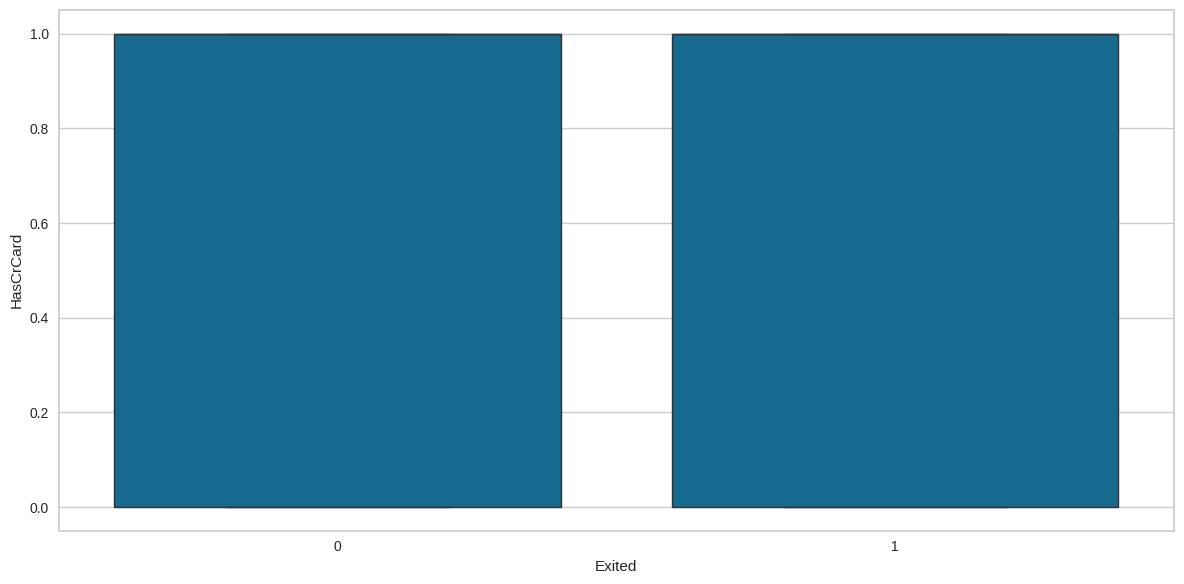

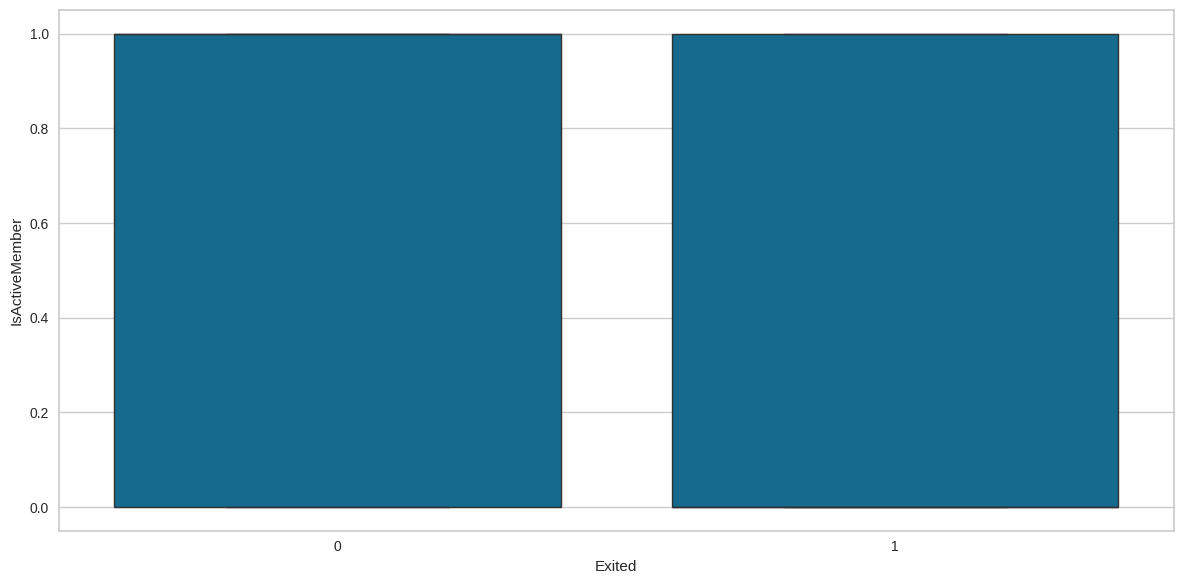

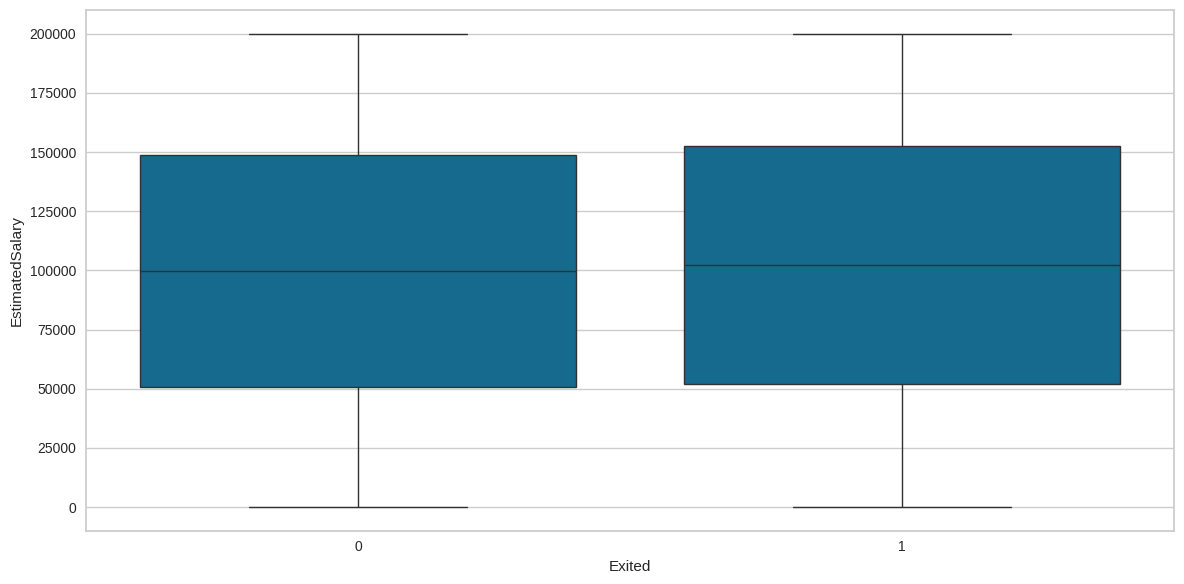

In [ ]:
#Vamos avaliar os outliers com grafico de boxplot de cada variavel com base em nossa variavel alvo(exited)
for column in df.columns:
    if column != 'Exited':
      plt.figure(figsize=(12, 6))
      sns.boxplot(x='Exited', y=column, data=df)
      plt.tight_layout()
plt.show()




 Com base inicial de correlação e analíse de outlier com base em nossa variável alvo vamos remover as seguintes variáveis:

  - **HasCrCard** : Trata-se de uma variável binária que indica se o cliente possui um cartão de crédito. Observamos que ela apresenta uma correlação muito baixa com a variável alvo, ou seja, sua inclusão não contribui significativamente para a predição desejada.

  - **CreditScore** : Esta variável numérica, que representa a pontuação de crédito do cliente, também não mostrou uma correlação relevante com a variável alvo. Além disso, identificamos alguns outliers, que, mesmo em quantidade reduzida, podem introduzir ruídos e afetar negativamente a acurácia do modelo.

  - **Tenure** : Representa o tempo de relacionamento do cliente com a instituição. Apesar de seu potencial para indicar lealdade ou estabilidade, sua baixa correlação com a variável alvo sugere que sua influência no resultado preditivo é mínima.
   

In [ ]:
# Vamos remover as seguintes variaveis (CreditScore,Geography) 'Geography',
df.drop(['HasCrCard' , 'EstimatedSalary','Tenure'], axis=1, inplace=True)
df.sample(10)


,CreditScore,Geography,Age,Balance,NumOfProducts,IsActiveMember,Exited
6772,539,1.0,39.0,0.00,2,1.0,0
8391,619,2.0,38.0,84651.79,1,1.0,0
4957,752,1.0,39.0,0.00,1,0.0,0
1238,746,1.0,24.0,137492.35,2,1.0,0
5610,733,1.0,28.0,0.00,2,0.0,0
5341,646,1.0,51.0,101629.30,1,0.0,0
2366,672,1.0,34.0,0.00,2,0.0,0
4044,658,1.0,32.0,0.00,1,1.0,0
6057,742,1.0,31.0,105239.10,1,1.0,0
2862,645,2.0,33.0,149564.61,1,0.0,0


In [ ]:
#Vamos verificar a quantidade de Balance = 0
df['Balance'].value_counts()

,count
Balance,
0.00,3617
130170.82,2
75075.31,2
105473.74,2
130142.79,2
...,...
107499.70,1
98807.45,1
136596.85,1


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7964
1,2038


In [ ]:
# Vamos verificar quantos valores possuem agora
df.shape

(10002, 7)

## Classificação de modelo
Com nosso EDA finalizado, estamos prontos para avançar à etapa de modelagem e avaliação utilizando o PyCaret. Essa biblioteca facilita a comparação e o ajuste de diversos modelos de machine learning, automatizando grande parte do processo.


In [ ]:
#Baixando bibliotecas necessárias para nossa análise
!pip install pycaret mlflow  -q


In [ ]:
! pip install scipy==1.11.4 -q

In [ ]:
#Dados de Treinamento
base_treinamento = df.sample(frac=0.7, random_state=42)

#Dados de Teste para certificamos a qualidade do nosso modelo ao final do trabalho
base_teste = df.drop(base_treinamento.index)

print(f'Base de Treinamento: {base_treinamento.shape}')
print(f'Base de Teste: {base_teste.shape}')

Base de Treinamento: (7001, 7)
Base de Teste: (3001, 7)


Nesta etapa é onde vamos utilizar a biblioteca pycaret para avaliar qual sera o melhor modelo para a nossa predição.

In [ ]:
# Realizar a configuracao do Pycaret
from pycaret.classification import setup
# Configurar ambiente do PyCaret
s = setup(data=base_treinamento,target='Exited',use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,3277
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(7001, 7)"
4,Transformed data shape,"(7001, 7)"
5,Transformed train set shape,"(4900, 7)"
6,Transformed test set shape,"(2101, 7)"
7,Numeric features,6
8,Rows with missing values,0.0%
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8673,0.8666,0.4860,0.7853,0.5991,0.5249,0.5473,0.5800
ada,Ada Boost Classifier,0.8618,0.8558,0.5040,0.7388,0.5983,0.5185,0.5328,0.5970
lightgbm,Light Gradient Boosting Machine,0.8598,0.8611,0.5180,0.7172,0.6013,0.5190,0.5292,0.1240
rf,Random Forest Classifier,0.8563,0.8517,0.5040,0.7096,0.5887,0.5047,0.5160,1.3070
xgboost,Extreme Gradient Boosting,0.8520,0.8482,0.5100,0.6846,0.5839,0.4964,0.5047,0.1380
et,Extra Trees Classifier,0.8512,0.8452,0.5040,0.6855,0.5803,0.4925,0.5014,0.5500
qda,Quadratic Discriminant Analysis,0.8369,0.8186,0.3120,0.7376,0.4370,0.3600,0.4062,0.0860
lr,Logistic Regression,0.8022,0.7586,0.1690,0.5656,0.2585,0.1803,0.2258,0.4560
lda,Linear Discriminant Analysis,0.8012,0.7632,0.1940,0.5470,0.2842,0.1978,0.2351,0.0440
dt,Decision Tree Classifier,0.7994,0.6977,0.5260,0.5085,0.5168,0.3903,0.3906,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3277, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Após avaliação dos resultados de desempenho no PyCaret, o GradientBoostingClassifier foi inicialmente indicado como o modelo de melhor performance. Entretanto, uma análise detalhada das métricas revelou que o Light Gradient Boosting Machine (LightGBM) apresenta vantagens estratégicas:

- Recall Superior: O LightGBM demonstrou um recall significativamente mais alto em comparação ao GradientBoostingClassifier, aspecto crítico para cenários onde a identificação de falsos negativos é prioritária (e.g., detecção de fraudes ou diagnósticos médicos).

- Eficiência Computacional: O LightGBM destacou-se por sua velocidade de processamento superior, mantendo performance robusta mesmo em grandes volumes de dados.

- Balanço entre Métricas: Embora o GradientBoostingClassifier tenha apresentado leve vantagem em métricas como AUC ou F1-score, as diferenças foram marginalmente pequenas (em torno de X%), enquanto o LightGBM garantiu equilíbrio mais adequado entre precisão e sensibilidade.


Diante desse cenário, optou-se pelo LightGBM como modelo final para predição, priorizando sua capacidade de generalização, eficiência operacional e desempenho em recall – fator alinhado aos objetivos estratégicos do projeto.

In [ ]:
#Criando o modelo lightgbm
from pycaret.classification import create_model
modelo = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8567,0.4800,0.6575,0.5549,0.4623,0.4707
1,0.8633,0.8680,0.5400,0.7200,0.6171,0.5360,0.5442
2,0.8612,0.8928,0.5300,0.7162,0.6092,0.5271,0.5359
3,0.8694,0.8824,0.5500,0.7432,0.6322,0.5549,0.5642
4,0.8510,0.8574,0.5100,0.6800,0.5829,0.4944,0.5020
5,0.8571,0.8374,0.5200,0.7027,0.5977,0.5132,0.5218
6,0.8816,0.8764,0.5500,0.8088,0.6548,0.5864,0.6023
7,0.8653,0.8699,0.5100,0.7500,0.6071,0.5294,0.5437
8,0.8449,0.8374,0.4700,0.6714,0.5529,0.4626,0.4734


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Apesar do bom desempenho inicial do Light Gradient Boosting Machine (LightGBM), propõe-se a realização de um refinamento através de hyperparameter tuning para maximizar sua eficácia. Essa etapa visa explorar combinações ótimas de parâmetros, potencializando métricas críticas (como recall, precisão e AUC-ROC) e garantindo robustez em cenários futuros.

In [ ]:
from pycaret.classification import tune_model
modelo_tunado = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8372,0.4600,0.7419,0.5679,0.4879,0.5079
1,0.8980,0.8850,0.6100,0.8472,0.7093,0.6494,0.6623
2,0.8592,0.8821,0.5200,0.7123,0.6012,0.5182,0.5276
3,0.8714,0.8655,0.5200,0.7761,0.6228,0.5489,0.5649
4,0.8612,0.8726,0.4800,0.7500,0.5854,0.5068,0.5250
5,0.8612,0.8416,0.4700,0.7581,0.5802,0.5025,0.5232
6,0.8816,0.8991,0.5400,0.8182,0.6506,0.5829,0.6012
7,0.8673,0.8644,0.5000,0.7692,0.6061,0.5306,0.5484
8,0.8306,0.8416,0.4200,0.6269,0.5030,0.4057,0.4175


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Após a aplicação do hyperparameter tuning, verificou-se uma melhoria significativa no desempenho do Light Gradient Boosting Machine (LightGBM). Portanto vamos utilizar para nossa predição final.

In [ ]:
from pycaret.classification import predict_model
pred = predict_model(modelo_tunado, data=base_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8520,0.8417,0.4401,0.7224,0.5469,0.4647,0.4851


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


## Resultado da Predição em Gráficos

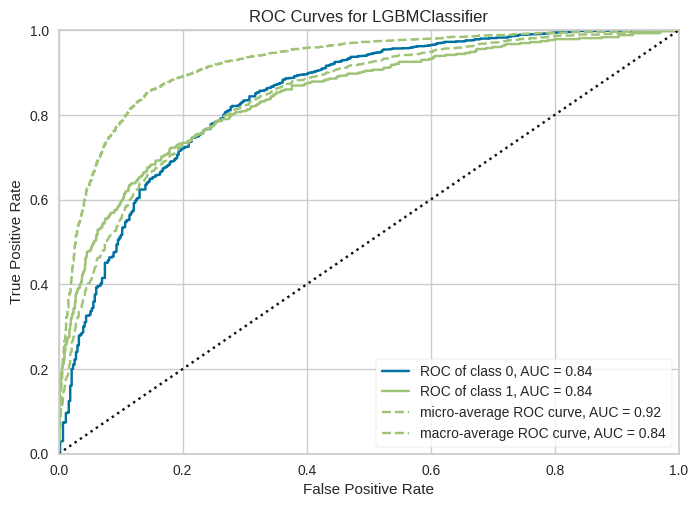

In [ ]:
from pycaret.classification import plot_model
plot_model(modelo_tunado)

In [ ]:
from pycaret.classification import evaluate_model
evaluate_model(modelo_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…